In [302]:
import pandas as pd 

In [303]:
df = pd.read_excel(r'C:\Users\User\Downloads\onlineretail\Online_Retail.xlsx')

In [304]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [305]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [306]:
df['Quantity'] = df['Quantity'].abs()


In [307]:
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    56,    72,
         200,   600,   480,    14,    11,    33,    13,    70,   252,
          60,   216,   384,    27,    15,    22,    19,    17,    21,
          34,    47,   108,    52,  9360,    38,    75,   270,    42,
         240,    90,   320,  1824,   204,    69,   160,  2880,  1400,
          39,    26,  1440,    31,    82,    78,    97,    98,    35,
          57,   110,   130,   140,   720,   156,   324,    37,    49,
          95,    29,    41,    43,    44,   402,   378,   150,   300,
          54,   104,    67,   258,    66,    55,    46,    99,    61,
         408,   972,   208,  1008,  1000,    77,  1488,   250,  1394,
         400,   223,   723,   177,    79,    84,   272,   145,   113,
          45,   106,

In [308]:
df.shape

(541909, 8)

In [309]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [310]:
df.dropna(subset=['CustomerID'],inplace=True)

In [311]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [312]:
df.shape

(406829, 8)

In [313]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [314]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [315]:
#Step1: exract the date from the column InvoiceDate

In [316]:
#df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [317]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [318]:
grouped_data = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])


In [319]:
grouped_data

,min,max
CustomerID,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00
...,...,...
18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00
18282.0,2011-08-05 13:35:00,2011-12-02 11:43:00


In [320]:
grouped_data.rename(columns={'min': 'First_purchase_date', 'max': 'Last_purchase_date'}, inplace=True)


In [321]:
grouped_data

,First_purchase_date,Last_purchase_date
CustomerID,,
12346.0,2011-01-18 10:01:00,2011-01-18 10:17:00
12347.0,2010-12-07 14:57:00,2011-12-07 15:52:00
12348.0,2010-12-16 19:09:00,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00,2011-02-02 16:01:00
...,...,...
18280.0,2011-03-07 09:52:00,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00,2011-06-12 10:53:00
18282.0,2011-08-05 13:35:00,2011-12-02 11:43:00


In [322]:
df = df.merge(grouped_data, left_on='CustomerID', right_index=True)


In [323]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,First_purchase_date,Last_purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00


In [324]:
df.dtypes

InvoiceNo                      object
StockCode                      object
Description                    object
Quantity                        int64
InvoiceDate            datetime64[ns]
UnitPrice                     float64
CustomerID                    float64
Country                        object
First_purchase_date    datetime64[ns]
Last_purchase_date     datetime64[ns]
dtype: object

In [325]:
df['Total_Price'] = df['UnitPrice']* df['Quantity']

In [326]:
df['customer_lifespan'] = (df['Last_purchase_date'] - df['First_purchase_date']).dt.days


In [327]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,First_purchase_date,Last_purchase_date,Total_Price,customer_lifespan
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,15.30,71
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,20.34,71
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,22.00,71
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,20.34,71
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,20.34,71
...,...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,15.00,0
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,10.20,0
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,10.20,0
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,24.96,0


In [328]:
avg_lifespan = df['customer_lifespan'].mean()


In [329]:
avg_lifespan

242.33772666157034

#recency: Represents the number of days between the most recent purchase date of a customer (calculated relative to the given today date) and the reference date (today). It indicates how recently a customer made a purchase.

In [330]:
today = pd.to_datetime('2023-06-30')


In [331]:
df['recency'] = (today - df['InvoiceDate']).dt.days


In [332]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,First_purchase_date,Last_purchase_date,Total_Price,customer_lifespan,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,15.30,71,4593
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,20.34,71,4593
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,22.00,71,4593
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,20.34,71,4593
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2011-02-10 14:38:00,20.34,71,4593
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,15.00,0,4220
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,10.20,0,4220
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,10.20,0,4220
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,2011-12-09 12:16:00,2011-12-09 12:16:00,24.96,0,4220


In [333]:
rfm_table = df.groupby('CustomerID').agg({'recency': 'min', 'InvoiceDate': 'count', 'Total_Price': 'sum'})


In [334]:
rfm_table

,recency,InvoiceDate,Total_Price
CustomerID,,,
12346.0,4545,2,154367.20
12347.0,4222,182,4310.00
12348.0,4295,31,1797.24
12349.0,4238,73,1757.55
12350.0,4530,17,334.40
...,...,...,...
18280.0,4497,10,180.60
18281.0,4400,7,80.82
18282.0,4227,13,179.50


In [335]:
rfm_table.rename(columns={'InvoiceDate': 'frequency', 'Total_Price': 'monetary_value'}, inplace=True)


In [336]:
rfm_table = rfm_table.sort_values('monetary_value', ascending=False)

In [337]:
rfm_table

,recency,frequency,monetary_value
CustomerID,,,
16446.0,4220,4,336942.10
14646.0,4221,2085,280923.02
18102.0,4220,433,262876.11
17450.0,4228,351,201619.41
14911.0,4221,5903,155077.50
...,...,...,...
12943.0,4521,1,3.75
16428.0,4301,1,2.95
14679.0,4591,1,2.55


In [338]:
#lets calculate the average purchase value of each customer

In [339]:
#rfm_table['avg_customer_Value'] = rfm_table['monetary_value']/rfm_table['frequency']
rfm_table['avg_purchase_value'] = rfm_table['monetary_value'] / rfm_table['frequency']


In [340]:
rfm_table

,recency,frequency,monetary_value,avg_purchase_value
CustomerID,,,,
16446.0,4220,4,336942.10,84235.525000
14646.0,4221,2085,280923.02,134.735261
18102.0,4220,433,262876.11,607.104180
17450.0,4228,351,201619.41,574.414274
14911.0,4221,5903,155077.50,26.270964
...,...,...,...,...
12943.0,4521,1,3.75,3.750000
16428.0,4301,1,2.95,2.950000
14679.0,4591,1,2.55,2.550000


In [341]:
rfm_table['frequency'].sum()

406829

In [342]:
rfm_table['retention_rate'] = rfm_table['frequency'] / rfm_table['frequency'].sum()

In [343]:
rfm_table

,recency,frequency,monetary_value,avg_purchase_value,retention_rate
CustomerID,,,,,
16446.0,4220,4,336942.10,84235.525000,0.000010
14646.0,4221,2085,280923.02,134.735261,0.005125
18102.0,4220,433,262876.11,607.104180,0.001064
17450.0,4228,351,201619.41,574.414274,0.000863
14911.0,4221,5903,155077.50,26.270964,0.014510
...,...,...,...,...,...
12943.0,4521,1,3.75,3.750000,0.000002
16428.0,4301,1,2.95,2.950000,0.000002
14679.0,4591,1,2.55,2.550000,0.000002


In [344]:
avg_cust_lifespan = 242.33772666157034

In [345]:
rfm_table['CLTV'] = rfm_table['avg_purchase_value'] * rfm_table['frequency']* avg_cust_lifespan



By multiplying the average purchase value, purchase frequency, and customer lifespan, you can obtain a more realistic estimation of the CLTV.

In [346]:
rfm_table = rfm_table.sort_values('CLTV',ascending=False)

In [347]:
rfm_table

,recency,frequency,monetary_value,avg_purchase_value,retention_rate,CLTV
CustomerID,,,,,,
16446.0,4220,4,336942.10,84235.525000,0.000010,8.165378e+07
14646.0,4221,2085,280923.02,134.735261,0.005125,6.807825e+07
18102.0,4220,433,262876.11,607.104180,0.001064,6.370480e+07
17450.0,4228,351,201619.41,574.414274,0.000863,4.885999e+07
14911.0,4221,5903,155077.50,26.270964,0.014510,3.758113e+07
...,...,...,...,...,...,...
12943.0,4521,1,3.75,3.750000,0.000002,9.087665e+02
16428.0,4301,1,2.95,2.950000,0.000002,7.148963e+02
14679.0,4591,1,2.55,2.550000,0.000002,6.179612e+02


In [351]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "U" BLING KEY RING',
       'LETTER "W" BLING KEY RING', 'LETTER "Z" BLING KEY RING'],
      dtype=object)

In [352]:
df['Description'].nunique()

3896

In [366]:
Most_frquently_brought_Product = df.groupby(['Description'])['Quantity'].count()

In [373]:
Most_frquently_brought_Product = Most_frquently_brought_Product.reset_index()

In [384]:
Most_frquently_brought_Product = Most_frquently_brought_Product.sort_values('Quantity',ascending=False)[:10]

In [385]:
Most_frquently_brought_Product

,Description,Quantity
3716,WHITE HANGING HEART T-LIGHT HOLDER,2070
2780,REGENCY CAKESTAND 3 TIER,1905
1771,JUMBO BAG RED RETROSPOT,1662
217,ASSORTED COLOUR BIRD ORNAMENT,1418
2355,PARTY BUNTING,1416
1953,LUNCH BAG RED RETROSPOT,1358
3014,SET OF 3 CAKE TINS PANTRY DESIGN,1232
2624,POSTAGE,1196
1945,LUNCH BAG BLACK SKULL.,1126
2279,PACK OF 72 RETROSPOT CAKE CASES,1080


<AxesSubplot:title={'center':'Top 10 product sales'}, xlabel='Description'>

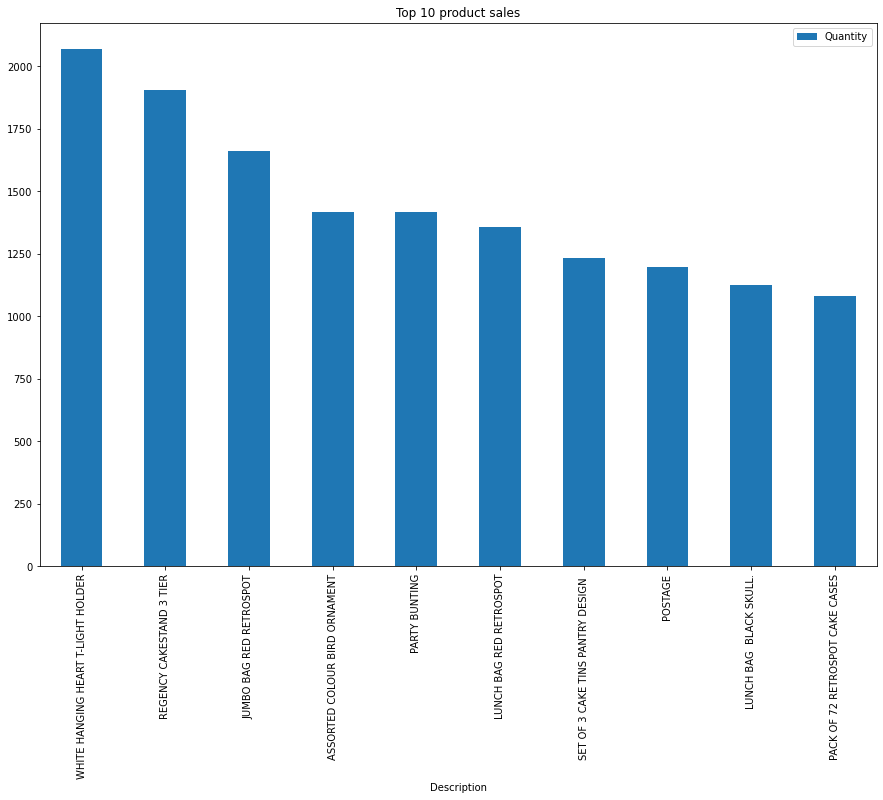

In [391]:
Most_frquently_brought_Product.plot(kind='bar',x='Description',title='Top 10 product sales',figsize=(15,10))

In [389]:
Most_frquently_brought_Product

,Description,Quantity
3716,WHITE HANGING HEART T-LIGHT HOLDER,2070
2780,REGENCY CAKESTAND 3 TIER,1905
1771,JUMBO BAG RED RETROSPOT,1662
217,ASSORTED COLOUR BIRD ORNAMENT,1418
2355,PARTY BUNTING,1416
1953,LUNCH BAG RED RETROSPOT,1358
3014,SET OF 3 CAKE TINS PANTRY DESIGN,1232
2624,POSTAGE,1196
1945,LUNCH BAG BLACK SKULL.,1126
2279,PACK OF 72 RETROSPOT CAKE CASES,1080
